In [1]:
#importing required librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

C:\Users\sivad\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#loading the dataset
data= pd.read_csv("housingdata.csv")

In [3]:
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
#analysing the dimensions of the dataset
data.shape

(18396, 22)

In [5]:
#Features in the dataset
data.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [6]:
data.dtypes

Unnamed: 0         int64
Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18396 entries, 0 to 18395
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     18396 non-null  int64  
 1   Suburb         18396 non-null  object 
 2   Address        18396 non-null  object 
 3   Rooms          18396 non-null  int64  
 4   Type           18396 non-null  object 
 5   Price          18396 non-null  int64  
 6   Method         18396 non-null  object 
 7   SellerG        18396 non-null  object 
 8   Date           18396 non-null  object 
 9   Distance       18395 non-null  float64
 10  Postcode       18395 non-null  float64
 11  Bedroom2       14927 non-null  float64
 12  Bathroom       14925 non-null  float64
 13  Car            14820 non-null  float64
 14  Landsize       13603 non-null  float64
 15  BuildingArea   7762 non-null   float64
 16  YearBuilt      8958 non-null   float64
 17  CouncilArea    12233 non-null  object 
 18  Lattit

In [8]:
data.tail()

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
18391,23540,Williamstown,8/2 Thompson St,2,t,622500,SP,Greg,26/08/2017,6.8,...,2.0,1.0,NaN,89.0,2010.0,NaN,-37.86393,144.90484,Western Metropolitan,6380.0
18392,23541,Williamstown,96 Verdon St,4,h,2500000,PI,Sweeney,26/08/2017,6.8,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
18393,23544,Yallambie,17 Amaroo Wy,4,h,1100000,S,Buckingham,26/08/2017,12.7,...,3.0,2.0,NaN,NaN,NaN,NaN,-37.72006,145.10547,Northern Metropolitan,1369.0
18394,23545,Yarraville,6 Agnes St,4,h,1285000,SP,Village,26/08/2017,6.3,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0
18395,23546,Yarraville,33 Freeman St,4,h,1050000,VB,Village,26/08/2017,6.3,...,2.0,2.0,NaN,139.0,1950.0,NaN,-37.81829,144.87404,Western Metropolitan,6543.0


# Data Cleaning and Preprocessing

# 1. checking for null values

In [9]:
data.isnull().sum()

Unnamed: 0           0
Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [10]:
#looking at total number of null values in the dataset
total_null_values= data.isnull().sum().sum()
total_null_values

48212

In [11]:
total_size= data.size
total_size

404712

In [12]:
#Calculating the percentage of missing values
proportion_null_values = (total_null_values / total_size) * 100
proportion_null_values

11.91266876198383

In [13]:
#for the postcoded we tried to  check with same address of the data and  assign
data[data['Postcode'].isnull()]

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
14440,18523,Footscray Lot,2/16 Stafford St,2,u,710000,S,Jas,15/07/2017,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
#But there is no postcode of that address so we are deleting the column
data[data['Suburb']=='Footscray Lot']['Postcode']
data[data['Address']=='2/16 Stafford St']['Postcode']

14440   NaN
Name: Postcode, dtype: float64

In [15]:
#dropping the rows with missing values for columns: Distance Postcode Regionname Propertycount
#dropping postcode,distance,regionname,propertycount does not affect the prediction as it is only one row.

In [16]:
data.dropna(subset=['Distance','Postcode','Regionname','Propertycount'], inplace=True)

In [17]:
data.shape

(18395, 22)

In [18]:
# Missing values in Bedroom2 column

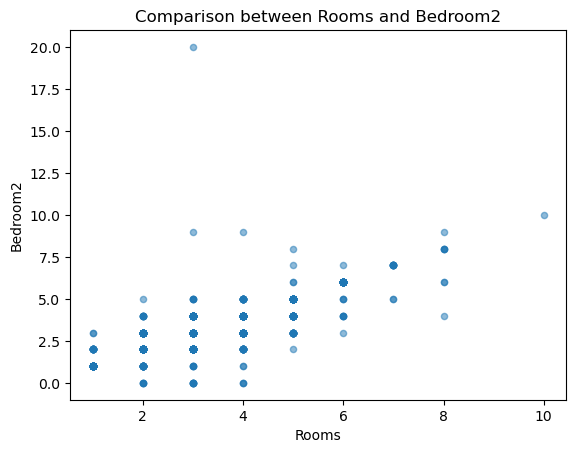

In [19]:
#Checking if the room and Bedroom2 values are similar
data[['Rooms', 'Bedroom2']].plot(kind='scatter', x='Rooms', y='Bedroom2', alpha=0.5)
plt.xlabel('Rooms')
plt.ylabel('Bedroom2')
plt.title('Comparison between Rooms and Bedroom2')
plt.show()


In [20]:
#Checking how many values are matching in Rooms and Bedroom2 columns
matching_values = data[data['Rooms'] == data['Bedroom2']]
len(matching_values)

14243

In [21]:
#Calculating the non matching values in Rooms and Bedroom2 columns
non_matching_values = data[data['Rooms'] != data['Bedroom2']]
len(non_matching_values)

4152

In [22]:
#Checking how many non null values of Bedroom2 do not match with the Rooms
non_null_values_nm = non_matching_values['Bedroom2'].notnull().sum()
non_null_values_nm

684

In [23]:
#Checking how many null values of Bedroom2 do not match with the Rooms
null_values_nm = non_matching_values['Bedroom2'].isnull().sum()
null_values_nm

3468

In [24]:
# If 'Rooms' and 'Bedroom2' are highly correlated, then we are taking the same number of rooms as bedroom
correlation_value = data['Rooms'].corr(data['Bedroom2'])
correlation_value

0.9487396463565343

In [25]:
#We can observe that the number of values that do not match Bedroom2 and Rooms without null values are only 684 and they are highly correlated, hence we can state that the two columns are almost equal.

In [26]:
#Filling Bedroom2 with corresponding Rooms value
data['Bedroom2'].fillna(data['Rooms'], inplace=True)

In [27]:
#Checking if Bathroom and Bedroom2 are correlated
correlation_bed_bath= data['Bedroom2'].corr(data['Bathroom'])
correlation_bed_bath

0.5899680459867476

In [28]:
#The correlation value is less

In [29]:
#Looking at the unique values in Bathroom Column
data['Bathroom'].unique()

array([ 1.,  2., nan,  3.,  4.,  0.,  7.,  5.,  6.,  8.])

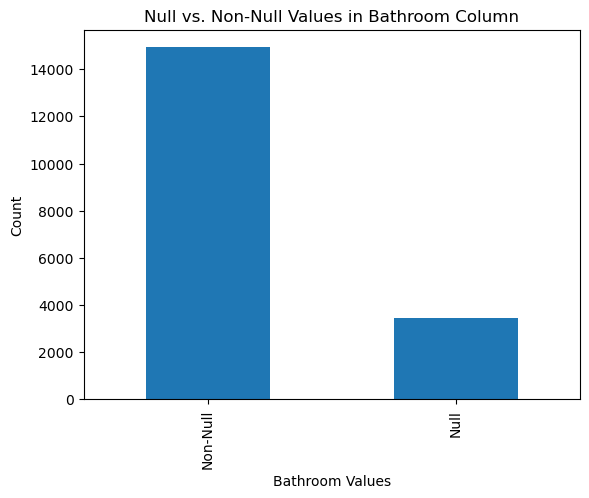

In [30]:
#Plotting a graph to analyze count of the Non-null and null values in Bathroom Column
data['Bathroom'].isnull().value_counts().plot(kind='bar')
plt.xticks([0, 1], ['Non-Null', 'Null'])
plt.xlabel('Bathroom Values')
plt.ylabel('Count')
plt.title('Null vs. Non-Null Values in Bathroom Column')
plt.show()

In [31]:
data['Car'].unique()

array([ 1.,  0.,  2., nan,  6.,  5.,  4.,  3.,  8.,  7.,  9., 10.])

In [32]:
data['Car'].value_counts()

2.0     6183
1.0     6072
0.0     1057
3.0      809
4.0      549
5.0       66
6.0       60
8.0       12
7.0        8
10.0       3
9.0        1
Name: Car, dtype: int64

In [33]:
#replacing the Bathroom and Car values with median:
cols_to_impute_with_median = ['Bathroom', 'Car']
for col in cols_to_impute_with_median:
    median_value = data[col].median()
    data[col].fillna(median_value, inplace=True)

In [34]:
# Filling the Landsize, BuildingArea values using IterativeImputer
imputer = IterativeImputer()
columns_to_impute_advanced = ['Landsize', 'BuildingArea']
data[columns_to_impute_advanced] = imputer.fit_transform(data[columns_to_impute_advanced])

In [35]:
#Fixing null values in Year Built
median_year = data['YearBuilt'].median()
data['YearBuilt'].fillna(median_year, inplace=True)

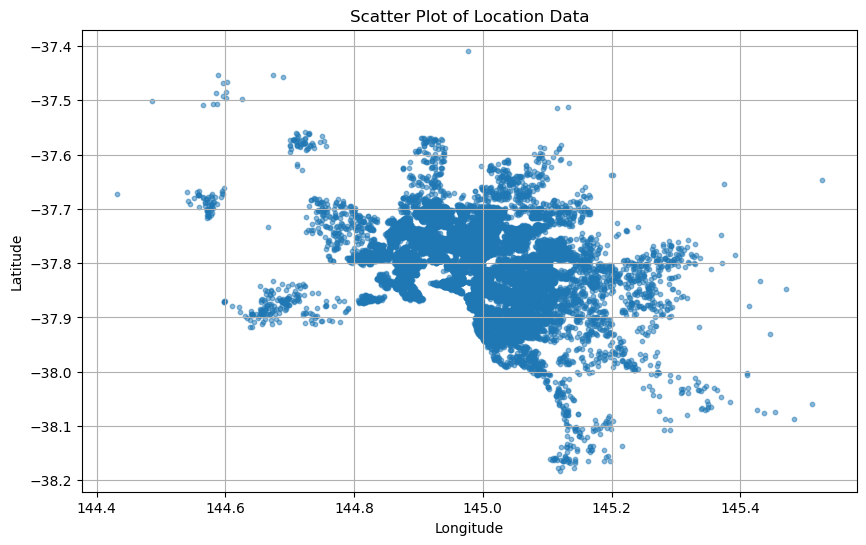

In [36]:
#Checking if the dataset has similar location data points
plt.figure(figsize=(10, 6))
plt.scatter(data['Longtitude'], data['Lattitude'], s=10, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Scatter Plot of Location Data')
plt.grid(True)
plt.show()

In [37]:
#KNN imputation estimates missing values by considering the values of the nearest neighbors in the dataset. As the dataset contains similar location data points that are close to each other.
imputer = KNNImputer(n_neighbors=5)
data[['Lattitude', 'Longtitude']] = imputer.fit_transform(data[['Lattitude', 'Longtitude']])

In [38]:
data.isnull().sum()

Unnamed: 0          0
Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      6162
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [39]:
# This will group by 'Suburb' and then find the mode of CouncilArea for each suburb and assign
#For rows where CouncilArea is missing, we set the CouncilArea based on the Suburb of that row
def get_mode_or_default(x, default='Unknown'):
    if len(x.mode()) > 0:
        return x.mode().iloc[0]
    else:
        return default
suburb_to_council = data.groupby('Suburb')['CouncilArea'].apply(get_mode_or_default).to_dict()
data['CouncilArea'] = data.apply(
    lambda row: suburb_to_council[row['Suburb']] if pd.isnull(row['CouncilArea']) else row['CouncilArea'],
    axis=1
)

In [40]:
data.isnull().sum()

Unnamed: 0       0
Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

In [41]:
data.shape

(18395, 22)

# 2. Removing Duplicates

In [42]:
#Dropping duplicates values in the dataset
data = data.drop_duplicates()
data.shape

(18395, 22)

In [43]:
#Checking the duplicate columns in the dataset
duplicates = data[data.duplicated()]
duplicates

,Unnamed: 0,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount


In [44]:
data.duplicated().any()

False

In [45]:
#There are no duplicates in the dataset

# 3. Dropping Unwanted columns in the dataset

In [46]:
data.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom',
       'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea',
       'Lattitude', 'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [47]:
#Since Rooms and Bedroom2 are highly correlated data and have same data. We are dropping the column "Bedroom2"
data.drop(columns=['Bedroom2'], inplace=True)

In [48]:
data.columns

Index(['Unnamed: 0', 'Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method',
       'SellerG', 'Date', 'Distance', 'Postcode', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

# 4. Changing Data Type of Columns

In [49]:
data.dtypes

Unnamed: 0         int64
Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [50]:
# Changing Date datatype to datetime type
data['Date'] = pd.to_datetime(data['Date'])

C:\Users\sivad\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/08/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sivad\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/05/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sivad\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/10/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\sivad\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/07/2016' in DD/MM/YYYY format. Provide format or specif

In [51]:
# Converting columns to int as Postcode, Bedroom2, YearBuilt and Property count are int values rather than float
columns_int = ['Postcode', 'Bathroom','Car','YearBuilt', 'Propertycount']
for col in columns_int:
    data[col] = data[col].astype(int)

In [52]:
#Converting price column datatype to float
data['Price'] = data['Price'].astype('float64')

In [53]:
# Converting the categorical columns to the 'category' data type
columns_obj = data.select_dtypes(["object"]).columns
data[columns_obj] = data[columns_obj].astype('category')

In [54]:
data.dtypes

Unnamed: 0                int64
Suburb                 category
Address                category
Rooms                     int64
Type                   category
Price                   float64
Method                 category
SellerG                category
Date             datetime64[ns]
Distance                float64
Postcode                  int32
Bathroom                  int32
Car                       int32
Landsize                float64
BuildingArea            float64
YearBuilt                 int32
CouncilArea            category
Lattitude               float64
Longtitude              float64
Regionname             category
Propertycount             int32
dtype: object

# 5. One-hot encoding on categorical columns

In [55]:
#Computing one-hot encoding for Type, Method and Regionname
ty=data['Type']
me=data['Method']
re=data['Regionname']
data = pd.get_dummies(data, columns=['Type', 'Method', 'Regionname'], drop_first=True)
data['Type']=ty
data['Method']=me
data['Regionname']=re

In [56]:
data.shape

(18395, 34)

In [57]:
data.dtypes

Unnamed: 0                                        int64
Suburb                                         category
Address                                        category
Rooms                                             int64
Price                                           float64
SellerG                                        category
Date                                     datetime64[ns]
Distance                                        float64
Postcode                                          int32
Bathroom                                          int32
Car                                               int32
Landsize                                        float64
BuildingArea                                    float64
YearBuilt                                         int32
CouncilArea                                    category
Lattitude                                       float64
Longtitude                                      float64
Propertycount                                   

# 6. Datetime Column: Extracting features

In [58]:
#Splitting the Date column to Year, Month, and Day
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
print(data.shape)

(18395, 37)


# 7. Adding feature Price per Square Meter to the dataset

In [59]:
#Computing the price per square meter 
#Making sure that the Landsize does not contain value 0, as it is a denominator value to compute Price_per_sqm
data['Landsize'] = data['Landsize'].replace(0, 1)
data['Price_per_sqm'] = data['Price'] / data['Landsize']
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,...,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Type,Method,Regionname,Year,Month,Day,Price_per_sqm
0,1,Abbotsford,85 Turner St,2,1480000.0,Biggin,2016-03-12,2.5,3067,1,...,0,0,0,h,S,Northern Metropolitan,2016,3,12,7326.732673
1,2,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,2016-04-02,2.5,3067,1,...,0,0,0,h,S,Northern Metropolitan,2016,4,2,6634.615385
2,4,Abbotsford,5 Charles St,3,1465000.0,Biggin,2017-04-03,2.5,3067,2,...,0,0,0,h,SP,Northern Metropolitan,2017,4,3,10932.835821
3,5,Abbotsford,40 Federation La,3,850000.0,Biggin,2017-04-03,2.5,3067,2,...,0,0,0,h,PI,Northern Metropolitan,2017,4,3,9042.553191
4,6,Abbotsford,55a Park St,4,1600000.0,Nelson,2016-04-06,2.5,3067,1,...,0,0,0,h,VB,Northern Metropolitan,2016,4,6,13333.333333


# 8. Adding feature to know the Age of the building

In [60]:
#getting the value of current year
current_year = pd.Timestamp.now().year
#Calculating the age
data['BuildingAge'] = current_year - data['YearBuilt']
data.head()

,Unnamed: 0,Suburb,Address,Rooms,Price,SellerG,Date,Distance,Postcode,Bathroom,...,Regionname_Western Metropolitan,Regionname_Western Victoria,Type,Method,Regionname,Year,Month,Day,Price_per_sqm,BuildingAge
0,1,Abbotsford,85 Turner St,2,1480000.0,Biggin,2016-03-12,2.5,3067,1,...,0,0,h,S,Northern Metropolitan,2016,3,12,7326.732673,53
1,2,Abbotsford,25 Bloomburg St,2,1035000.0,Biggin,2016-04-02,2.5,3067,1,...,0,0,h,S,Northern Metropolitan,2016,4,2,6634.615385,123
2,4,Abbotsford,5 Charles St,3,1465000.0,Biggin,2017-04-03,2.5,3067,2,...,0,0,h,SP,Northern Metropolitan,2017,4,3,10932.835821,123
3,5,Abbotsford,40 Federation La,3,850000.0,Biggin,2017-04-03,2.5,3067,2,...,0,0,h,PI,Northern Metropolitan,2017,4,3,9042.553191,53
4,6,Abbotsford,55a Park St,4,1600000.0,Nelson,2016-04-06,2.5,3067,1,...,0,0,h,VB,Northern Metropolitan,2016,4,6,13333.333333,9


# 9. Removing Miscellaneous Values

In [61]:
data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Year,Month,Day,Price_per_sqm,BuildingAge
count,18395.000000,18395.000000,1.839500e+04,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,...,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,1.839500e+04,18395.000000
mean,11826.423050,2.935091,1.056716e+06,10.389986,3107.140147,1.436912,1.690242,554.209729,168.297551,1967.993640,...,0.003425,0.036967,0.344822,0.211307,0.002283,2016.562164,6.741343,16.474803,7.066126e+04,55.006360
std,6800.716076,0.958203,6.419340e+05,6.009050,95.000995,0.655666,0.871392,3429.354803,938.154921,25.910549,...,0.058423,0.188685,0.475323,0.408247,0.047730,0.496134,2.738060,7.958961,2.288355e+05,25.910549
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,-30.525235,0.000000,1196.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,2.000000,-7.968523e+04,5.000000
25%,5936.500000,2.000000,6.330000e+05,6.300000,3046.000000,1.000000,1.000000,243.000000,100.000000,1970.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,9.000000,1.345577e+03,53.000000
50%,11820.000000,3.000000,8.800000e+05,9.700000,3085.000000,1.000000,2.000000,554.104157,165.410361,1970.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,7.000000,16.000000,2.290076e+03,53.000000
75%,17733.000000,3.000000,1.302000e+06,13.300000,3149.000000,2.000000,2.000000,601.000000,173.000000,1970.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,2017.000000,9.000000,24.000000,4.336082e+03,53.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,8.000000,10.000000,433014.000000,112612.125506,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,30.000000,3.900000e+06,827.000000


In [62]:
# From the above table, the minimum YearBuilt is 1196 which shows ambiguity
#Checking invalid years that are less than year value 1800
invalid_years = data[data['YearBuilt'] < 1800]
print(invalid_years.YearBuilt)

12754    1196
Name: YearBuilt, dtype: int32


In [63]:
#computing mode for the column
mode_year = data['YearBuilt'].mode().values[0]
#replacing the value with mode
data.loc[data['YearBuilt'] == 1196, 'YearBuilt'] = mode_year
mode_year

1970

In [64]:
data.describe()

,Unnamed: 0,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,...,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Year,Month,Day,Price_per_sqm,BuildingAge
count,18395.000000,18395.000000,1.839500e+04,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,...,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,18395.000000,1.839500e+04,18395.000000
mean,11826.423050,2.935091,1.056716e+06,10.389986,3107.140147,1.436912,1.690242,554.209729,168.297551,1968.035716,...,0.003425,0.036967,0.344822,0.211307,0.002283,2016.562164,6.741343,16.474803,7.066126e+04,55.006360
std,6800.716076,0.958203,6.419340e+05,6.009050,95.000995,0.655666,0.871392,3429.354803,938.154921,25.277550,...,0.058423,0.188685,0.475323,0.408247,0.047730,0.496134,2.738060,7.958961,2.288355e+05,25.910549
min,1.000000,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,-30.525235,0.000000,1830.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,1.000000,2.000000,-7.968523e+04,5.000000
25%,5936.500000,2.000000,6.330000e+05,6.300000,3046.000000,1.000000,1.000000,243.000000,100.000000,1970.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2016.000000,5.000000,9.000000,1.345577e+03,53.000000
50%,11820.000000,3.000000,8.800000e+05,9.700000,3085.000000,1.000000,2.000000,554.104157,165.410361,1970.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,7.000000,16.000000,2.290076e+03,53.000000
75%,17733.000000,3.000000,1.302000e+06,13.300000,3149.000000,2.000000,2.000000,601.000000,173.000000,1970.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,2017.000000,9.000000,24.000000,4.336082e+03,53.000000
max,23546.000000,12.000000,9.000000e+06,48.100000,3978.000000,8.000000,10.000000,433014.000000,112612.125506,2018.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,2017.000000,12.000000,30.000000,3.900000e+06,827.000000


# 10. Removing noisy data in Rooms and Bathroom

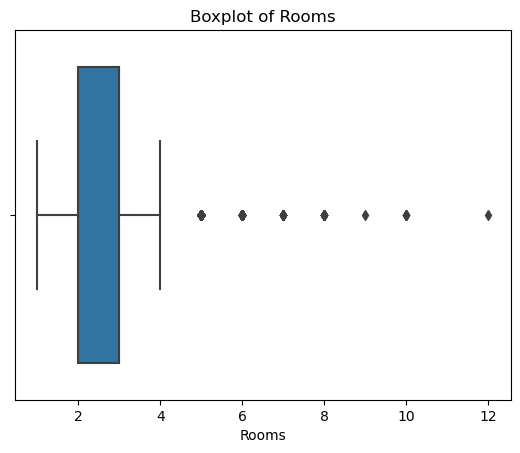

In [65]:
# for Rooms: plotting the boxplot
sns.boxplot(x=data['Rooms'])
plt.title('Boxplot of Rooms')
plt.show()

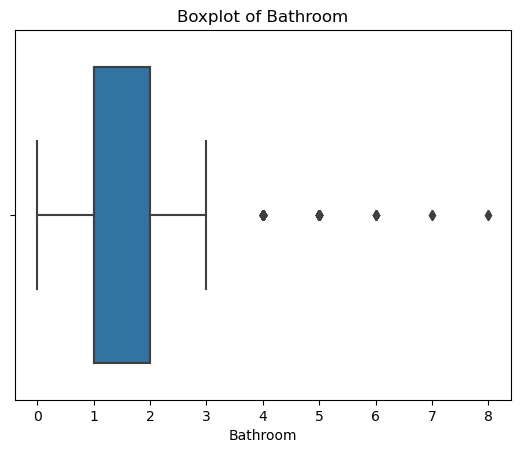

In [66]:
# for Bathroom: plotting the boxplot
sns.boxplot(x=data['Bathroom'])
plt.title('Boxplot of Bathroom')
plt.show()

In [67]:
#As Rooms cannot have values like 12 which is unlikely we are removing such values
#As Bathrooms cannot have values like 8  which is unlikely we are removing such values
#Assuming the maximum reasonable number of rooms as 5
max_rooms = 5
data['Rooms'] = data['Rooms'].apply(lambda x: max_rooms if x > max_rooms else x)

# Assuming the maximum reasonable number of bathrooms as 4
max_bathrooms = 4
data['Bathroom'] = data['Bathroom'].apply(lambda x: max_bathrooms if x > max_bathrooms else x)

# 11. Label Encoder

In [68]:
data.dtypes

Unnamed: 0                                        int64
Suburb                                         category
Address                                        category
Rooms                                             int64
Price                                           float64
SellerG                                        category
Date                                     datetime64[ns]
Distance                                        float64
Postcode                                          int32
Bathroom                                          int64
Car                                               int32
Landsize                                        float64
BuildingArea                                    float64
YearBuilt                                         int32
CouncilArea                                    category
Lattitude                                       float64
Longtitude                                      float64
Propertycount                                   

In [69]:
data.Suburb.unique()

['Abbotsford', 'Airport West', 'Albert Park', 'Alphington', 'Altona', ..., 'Laverton', 'Lilydale', 'Plumpton', 'croydon', 'Monbulk']
Length: 329
Categories (329, object): ['Abbotsford', 'Aberfeldie', 'Airport West', 'Albanvale', ..., 'Yallambie', 'Yarra Glen', 'Yarraville', 'croydon']

In [70]:
data.Suburb.value_counts()

Reservoir         541
Bentleigh East    368
Richmond          333
Preston           312
Brunswick         286
                 ... 
Healesville         1
Heatherton          1
Tecoma              1
Upwey               1
croydon             1
Name: Suburb, Length: 329, dtype: int64

In [71]:
#using label encoder to convert categorical values to numeric
label_encoder = LabelEncoder()
data['Suburb_encoded'] = label_encoder.fit_transform(data['Suburb'])
data['SellerG_encoded'] = label_encoder.fit_transform(data['SellerG'])
data['CouncilArea_encoded'] = label_encoder.fit_transform(data['CouncilArea'])
data.drop(['Suburb',  'SellerG', 'CouncilArea'], axis=1, inplace=True)

In [72]:
data.dtypes

Unnamed: 0                                        int64
Address                                        category
Rooms                                             int64
Price                                           float64
Date                                     datetime64[ns]
Distance                                        float64
Postcode                                          int32
Bathroom                                          int64
Car                                               int32
Landsize                                        float64
BuildingArea                                    float64
YearBuilt                                         int32
Lattitude                                       float64
Longtitude                                      float64
Propertycount                                     int32
Type_t                                            uint8
Type_u                                            uint8
Method_S                                        

# 12. Detecting Outliers

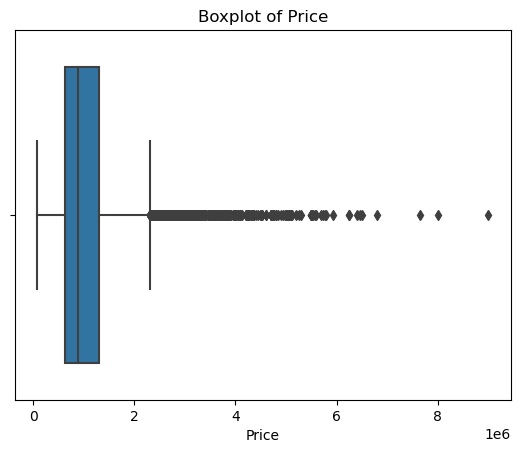

In [73]:
# Boxplot for Price
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')
plt.show()

In [74]:
#Removing the outliers in Price using Quantile
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1
filter = (data['Price'] >= Q1 - 1.5 * IQR) & (data['Price'] <= Q3 + 1.5 *IQR)
data = data.loc[filter]

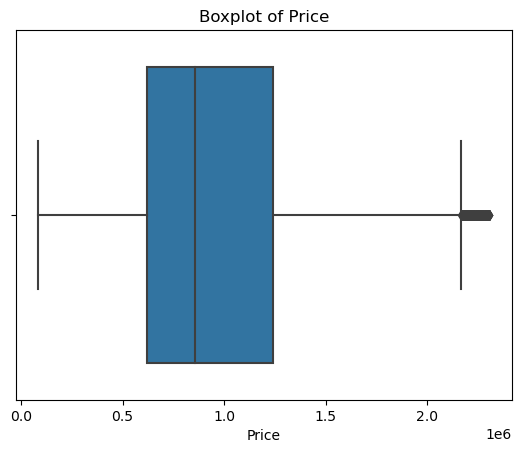

In [75]:
sns.boxplot(x=data['Price'])
plt.title('Boxplot of Price')
plt.show()

# 13. Resetting the index

In [76]:
#Resetting the index 
data = data.reset_index(drop=True)
data

,Unnamed: 0,Address,Rooms,Price,Date,Distance,Postcode,Bathroom,Car,Landsize,...,Method,Regionname,Year,Month,Day,Price_per_sqm,BuildingAge,Suburb_encoded,SellerG_encoded,CouncilArea_encoded
0,1,85 Turner St,2,1480000.0,2016-03-12,2.5,3067,1,1,202.000000,...,S,Northern Metropolitan,2016,3,12,7326.732673,53,0,29,32
1,2,25 Bloomburg St,2,1035000.0,2016-04-02,2.5,3067,1,0,156.000000,...,S,Northern Metropolitan,2016,4,2,6634.615385,123,0,29,32
2,4,5 Charles St,3,1465000.0,2017-04-03,2.5,3067,2,0,134.000000,...,SP,Northern Metropolitan,2017,4,3,10932.835821,123,0,29,32
3,5,40 Federation La,3,850000.0,2017-04-03,2.5,3067,2,1,94.000000,...,PI,Northern Metropolitan,2017,4,3,9042.553191,53,0,29,32
4,6,55a Park St,4,1600000.0,2016-04-06,2.5,3067,1,2,120.000000,...,VB,Northern Metropolitan,2016,4,6,13333.333333,9,0,178,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17538,23539,83 Power St,3,1170000.0,2017-08-26,6.8,3016,2,4,436.000000,...,S,Western Metropolitan,2017,8,26,2683.486239,26,319,222,10
17539,23540,8/2 Thompson St,2,622500.0,2017-08-26,6.8,3016,2,1,278.689909,...,SP,Western Metropolitan,2017,8,26,2233.665376,13,319,100,10
17540,23544,17 Amaroo Wy,4,1100000.0,2017-08-26,12.7,3085,3,2,554.104157,...,S,Northern Metropolitan,2017,8,26,1985.186333,53,325,38,0
17541,23545,6 Agnes St,4,1285000.0,2017-08-26,6.3,3013,1,1,362.000000,...,SP,Western Metropolitan,2017,8,26,3549.723757,103,327,273,16


In [77]:
#removing the column unnamed
data.drop(columns=['Unnamed: 0'], inplace=True)

In [78]:
data.isnull().sum()

Address                                  0
Rooms                                    0
Price                                    0
Date                                     0
Distance                                 0
Postcode                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Type_t                                   0
Type_u                                   0
Method_S                                 0
Method_SA                                0
Method_SP                                0
Method_VB                                0
Regionname_Eastern Victoria              0
Regionname_Northern Metropolitan         0
Regionname_Northern Victoria             0
Regionname_

# 14. Scaling the Dataset

In [79]:
num_cols = ['Distance','Landsize', 'BuildingArea']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

# Exploratory Data Analysis (EDA)

# 1. Correlation Matrix Using Heatmap

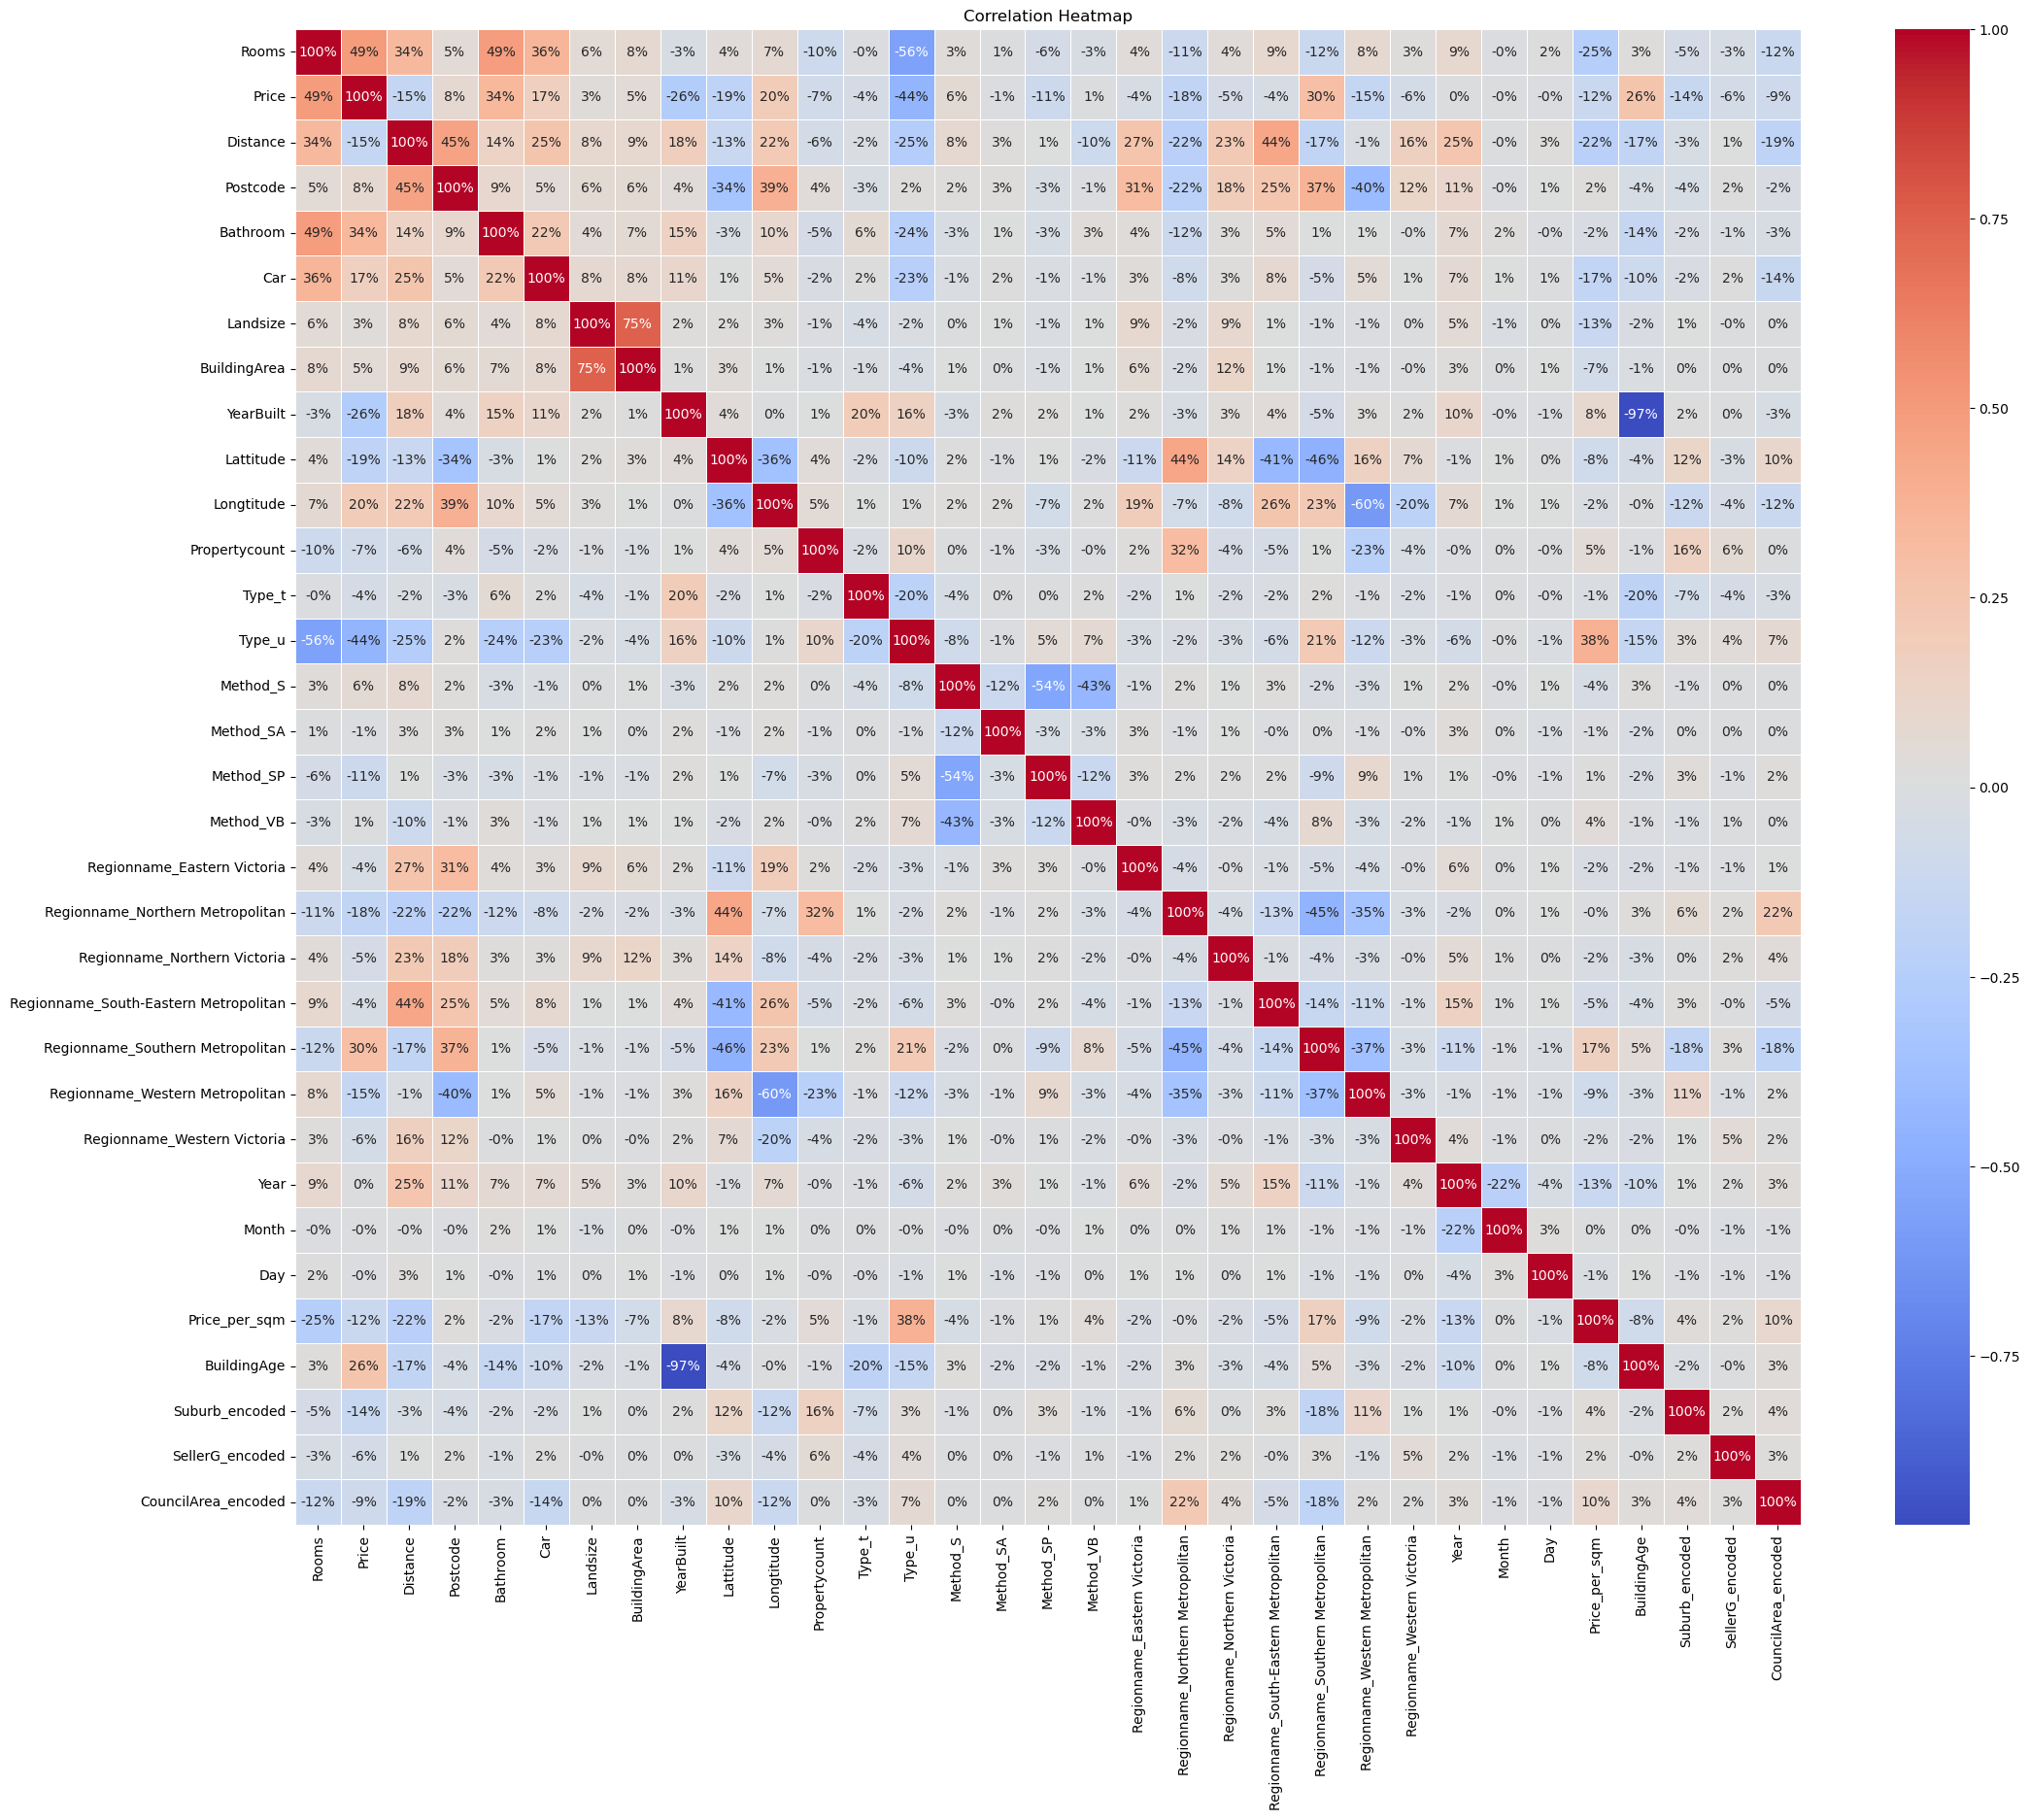

In [80]:
correlation_matrix = data.corr()
plt.figure(figsize=(25, 20))
sns.heatmap (correlation_matrix, annot=True, cmap='coolwarm', fmt='.0%' ,linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# 2. CountPlot

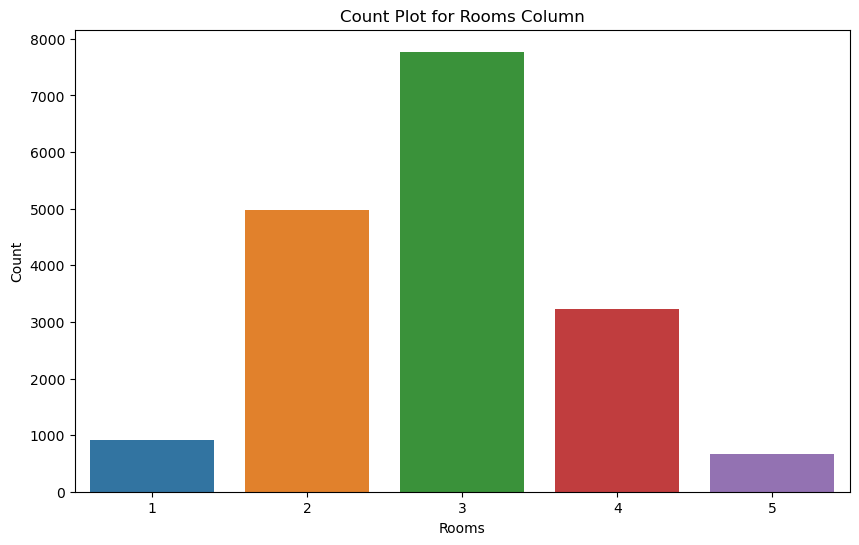

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Rooms')
plt.title('Count Plot for Rooms Column')
plt.xlabel('Rooms')
plt.ylabel('Count')
plt.show()

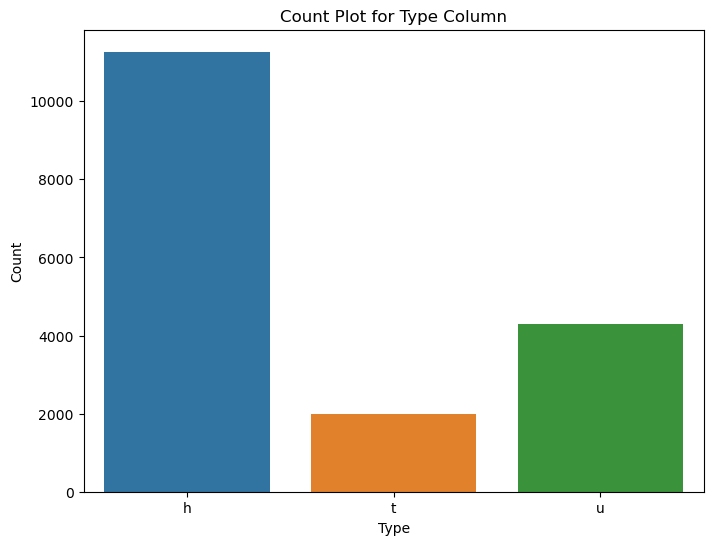

In [82]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Type')
plt.title('Count Plot for Type Column')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

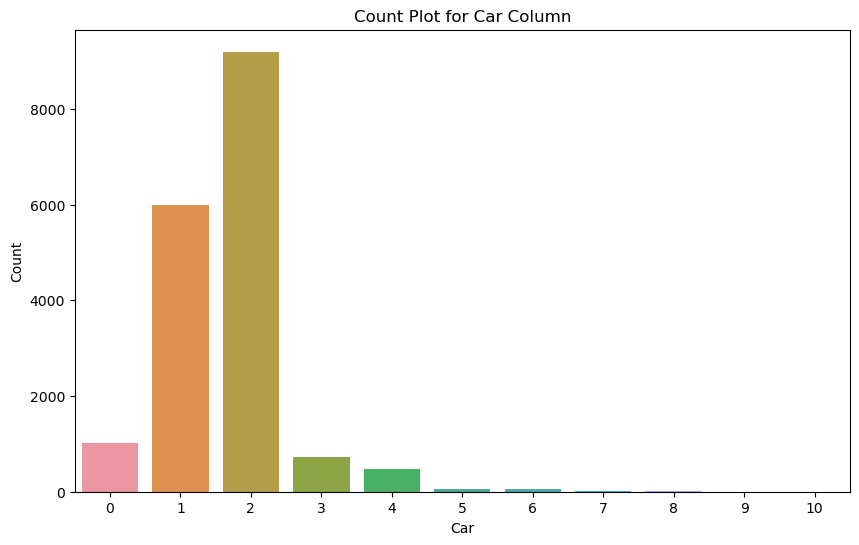

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Car')
plt.title('Count Plot for Car Column')
plt.xlabel('Car')
plt.ylabel('Count')
plt.show()

# 3. Univariate Non Graphical EDA

In [84]:
# Summary statistics for numeric columns
numeric_summary = data.describe()
numeric_summary

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,Regionname_Western Metropolitan,Regionname_Western Victoria,Year,Month,Day,Price_per_sqm,BuildingAge,Suburb_encoded,SellerG_encoded,CouncilArea_encoded
count,17543.000000,1.754300e+04,1.754300e+04,17543.000000,17543.000000,17543.000000,1.754300e+04,1.754300e+04,17543.000000,17543.000000,...,17543.000000,17543.000000,17543.000000,17543.000000,17543.000000,1.754300e+04,17543.000000,17543.000000,17543.000000,17543.000000
mean,2.872770,9.597913e+05,7.228316e-15,3105.848031,1.395998,1.666876,-9.334875e-16,5.090509e-16,1968.599042,-37.808498,...,0.220031,0.002394,2016.563929,6.735222,16.468278,7.175560e+04,54.445078,161.295559,151.703414,14.921222
std,0.899018,4.438280e+05,1.000029e+00,96.607316,0.596134,0.857715,1.000029e+00,1.000029e+00,24.581302,0.074284,...,0.414279,0.048873,0.495910,2.726263,7.968843,2.213058e+05,25.263923,94.884988,88.169465,9.843315
min,1.000000,8.500000e+04,-1.727967e+00,3000.000000,0.000000,0.000000,-4.292649e-01,-3.541768e-01,1830.000000,-38.182550,...,0.000000,0.000000,2016.000000,1.000000,2.000000,-7.968523e+04,5.000000,0.000000,0.000000,0.000000
25%,2.000000,6.220000e+05,-6.923690e-01,3044.000000,1.000000,1.000000,-2.270790e-01,-1.377194e-01,1970.000000,-37.844280,...,0.000000,0.000000,2016.000000,5.000000,9.000000,1.312442e+03,53.000000,71.000000,83.000000,6.000000
50%,3.000000,8.550000e+05,-1.005989e-01,3083.000000,1.000000,2.000000,2.436279e-02,4.495810e-03,1970.000000,-37.809849,...,0.000000,0.000000,2017.000000,7.000000,16.000000,2.195513e+03,53.000000,161.000000,157.000000,16.000000
75%,3.000000,1.240000e+06,4.911712e-01,3149.000000,2.000000,2.000000,5.221522e-02,2.138254e-02,1970.000000,-37.764620,...,0.000000,0.000000,2017.000000,9.000000,24.000000,4.081879e+03,53.000000,245.000000,224.000000,23.000000
max,5.000000,2.305000e+06,6.178740e+00,3978.000000,4.000000,10.000000,5.856461e+01,9.898194e+01,2018.000000,-37.408530,...,1.000000,1.000000,2017.000000,12.000000,30.000000,2.300000e+06,827.000000,328.000000,304.000000,33.000000


In [85]:
#skewness of the Price column in the data
price_skewness = data['Price'].skew()
price_skewness

0.8341881662892019

In [86]:
#Calculating Central Tendency
mean_price = data['Price'].mean()
median_price = data['Price'].median()
mode_price = data['Price'].mode().values[0]
print(mean_price)
print(median_price)
print(mode_price)

959791.2901442171
855000.0
600000.0


# 4. Scatter Plot

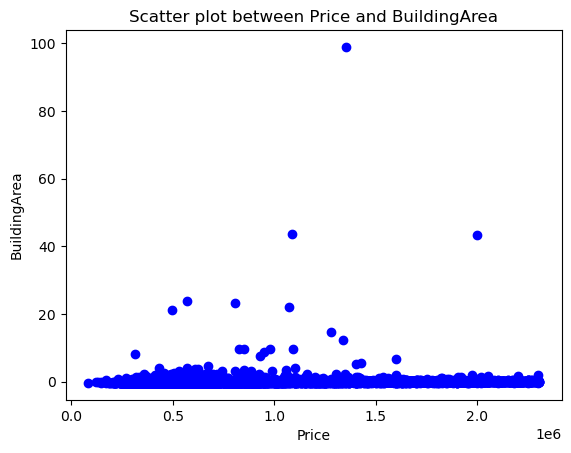

In [87]:
#Scatter plot between Price and Buildingarea
plt.scatter(x=data['Price'],y=data['BuildingArea'], label='Scatter Plot', color='blue', marker='o')
plt.title("Scatter plot between Price and BuildingArea")
plt.xlabel("Price")
plt.ylabel("BuildingArea")
plt.show()

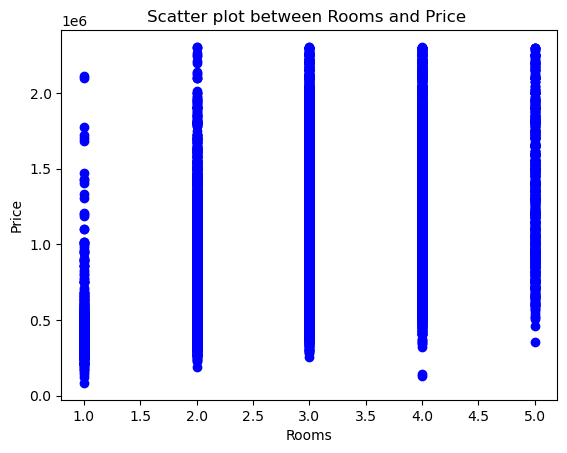

In [88]:
plt.scatter(x=data['Rooms'],y=data['Price'], label='Scatter Plot', color='blue', marker='o')
plt.title("Scatter plot between Rooms and Price ")
plt.xlabel("Rooms")
plt.ylabel("Price")
plt.show()

# 5. Pair Plot

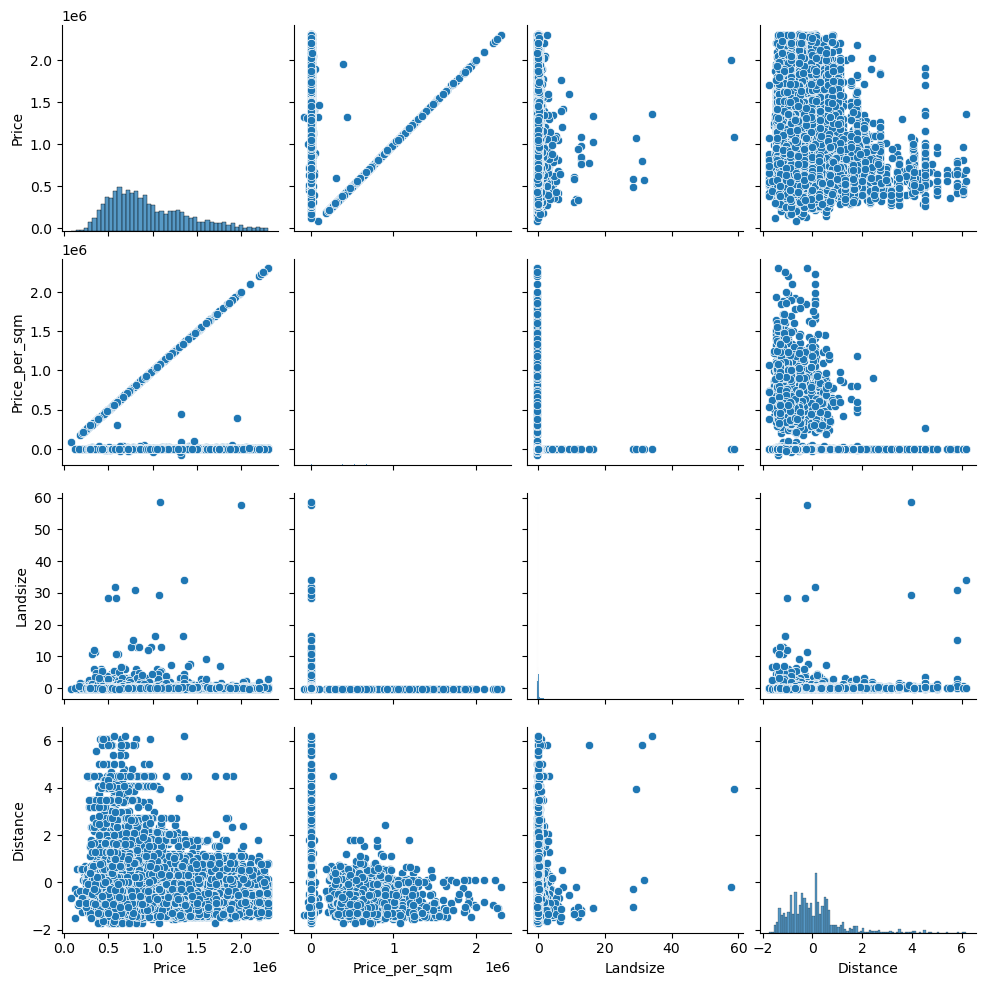

In [89]:
sns.pairplot(data[['Price', 'Price_per_sqm', 'Landsize', 'Distance']])
plt.show()

# 6. Box Plot

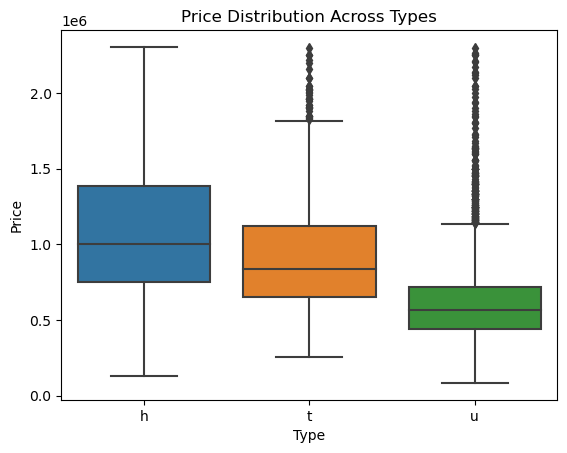

In [90]:
sns.boxplot(x=data['Type'], y=data['Price'])
plt.title('Price Distribution Across Types')
plt.xlabel("Type")
plt.ylabel("Price")
plt.show()

# 7. Histograms

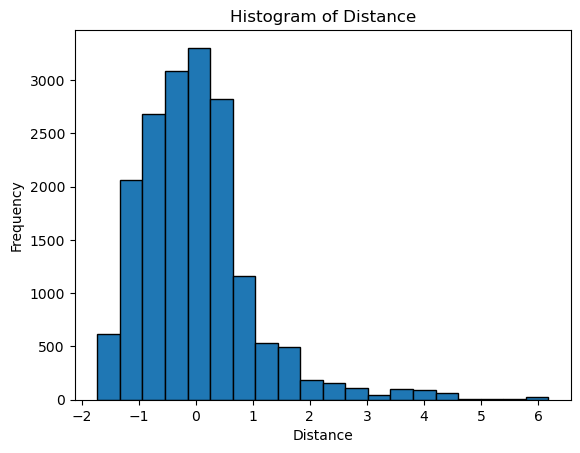

In [91]:
plt.hist(data['Distance'], bins=20, edgecolor='black')
plt.title('Histogram of Distance')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

# 8. JointPlot

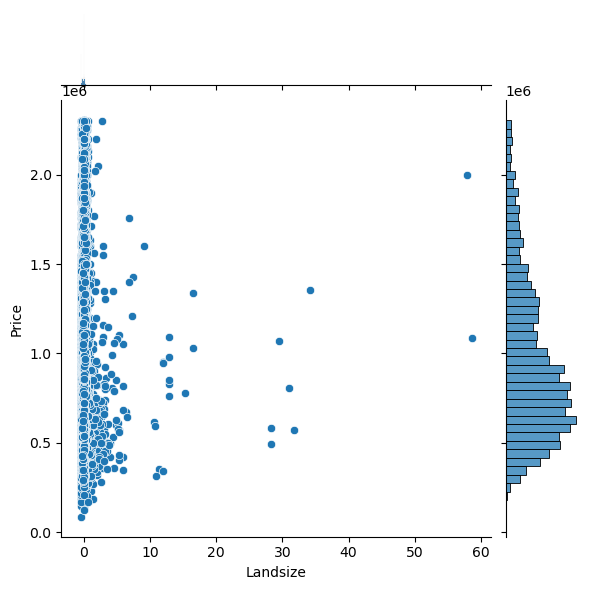

In [92]:
sns.jointplot(x='Landsize', y='Price', data=data, kind='scatter')
plt.xlabel('Landsize')
plt.ylabel('Price')
plt.show()

# 9. Lineplot

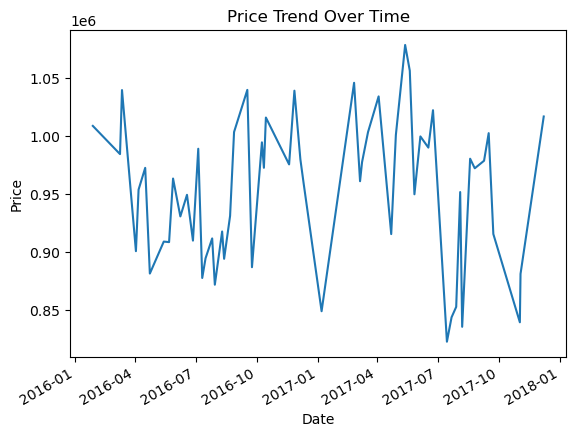

In [93]:
data.groupby('Date')['Price'].mean().plot()
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# 10. DistPlot

C:\Users\sivad\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


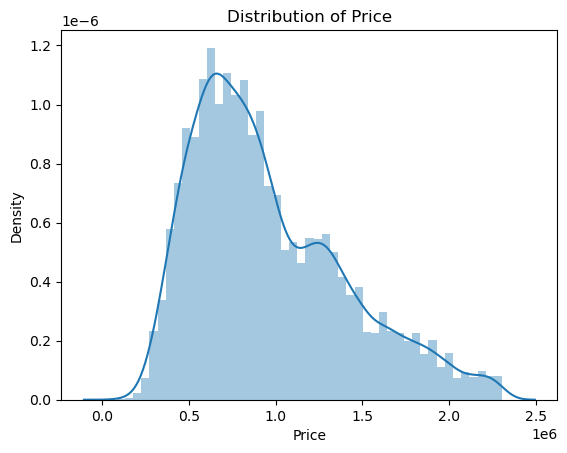

In [94]:
sns.distplot(data['Price'])
plt.title('Distribution of Price')
plt.show()

# 11. Feature Importance

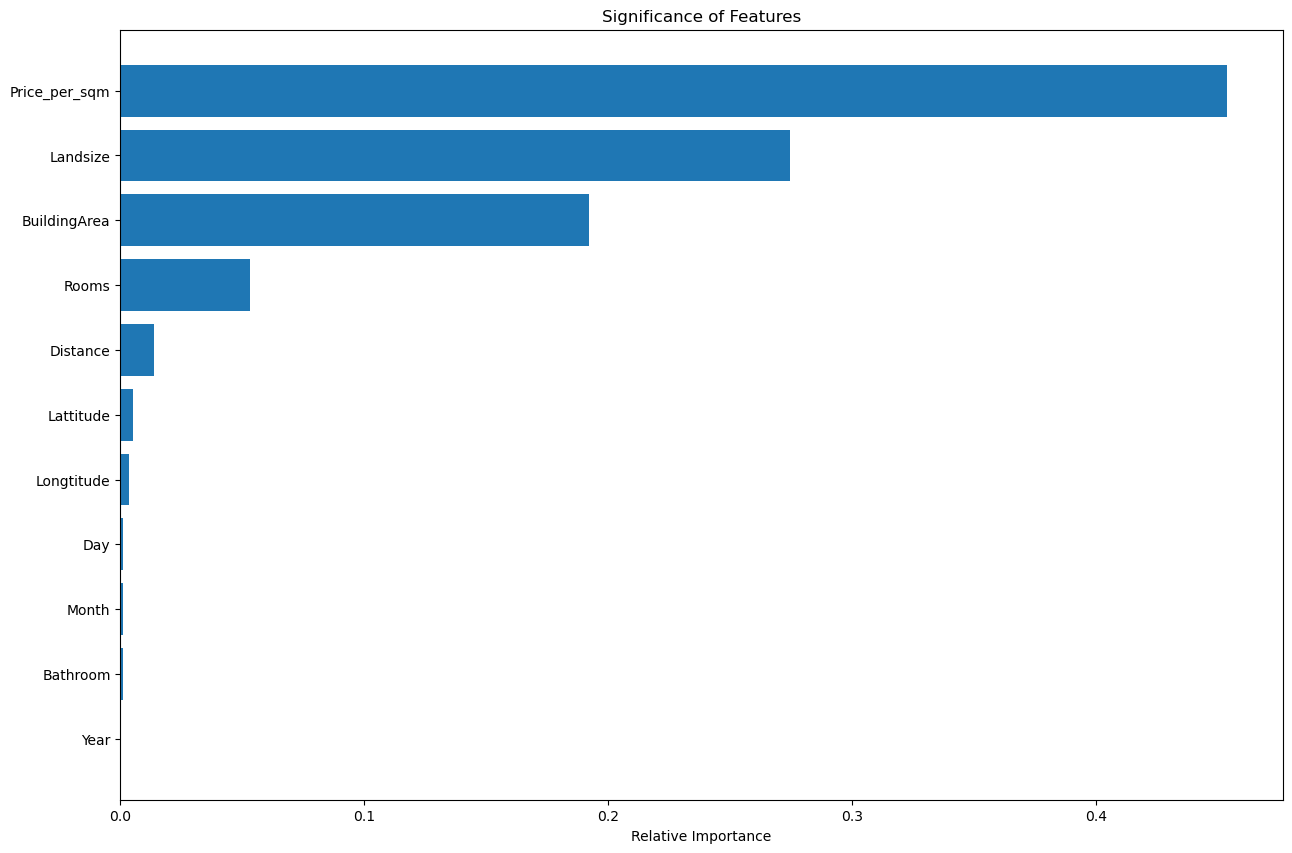

In [95]:
from sklearn.ensemble import RandomForestRegressor
X = data.drop('Price', axis=1).select_dtypes(include=['float64', 'int64'])
y = data['Price']
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(15, 10))
indices = np.argsort(importances)
plt.title('Significance of Features')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


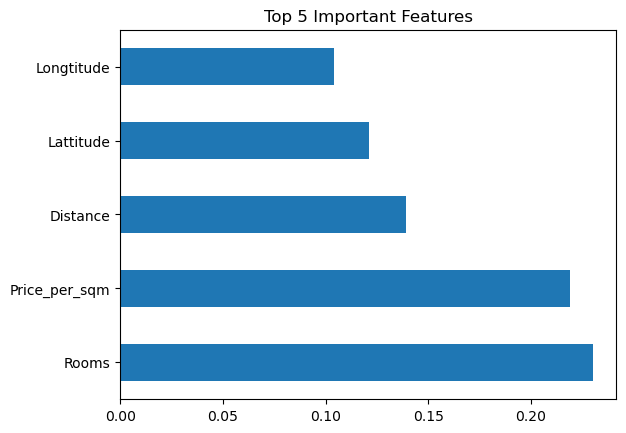

In [96]:
#Extract Important Variables
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
X = data.drop('Price', axis=1).select_dtypes(include=['float64', 'int64'])
y = data['Price']
model.fit(X, y)
feat_importances = pd.Series(model.feature_importances_, index=X.select_dtypes(include=[int, float]).columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Top 5 Important Features')
plt.show()

# 12. Q-Q Plot to Assess the Normality of Price Distribution

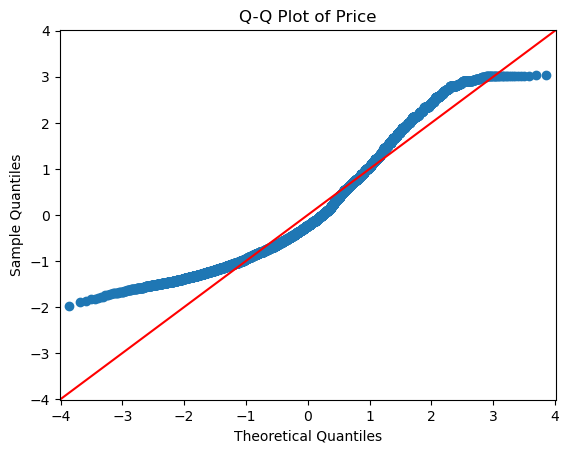

In [97]:
scaler = StandardScaler()
columns_to_scale = ['Price'] 
data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
sm.qqplot(data['Price'], line ='45')
plt.title('Q-Q Plot of Price')
plt.show()

# 13. Piechart

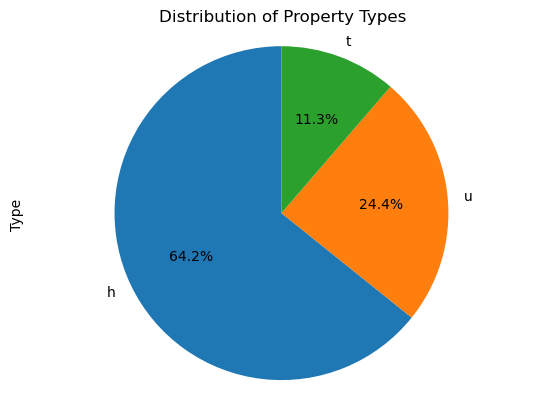

In [98]:
data['Type'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Property Types')
plt.axis('equal')
plt.show()

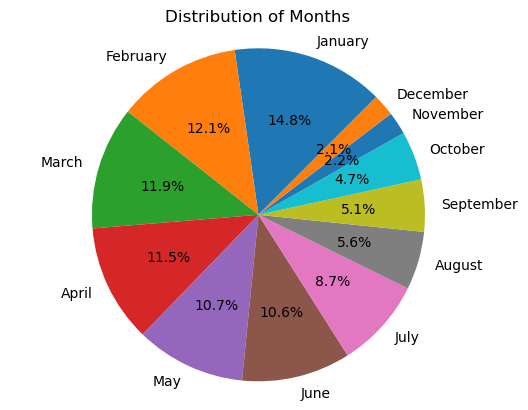

<Figure size 2500x2000 with 0 Axes>

In [99]:
label=['January','February','March','April','May','June','July','August','September','October','November','December']
value_counts = data['Month'].value_counts()
plt.pie(value_counts, labels=label, autopct='%1.1f%%', startangle=45)
plt.title('Distribution of Months')
plt.axis('equal')
plt.figure(figsize=(25, 20))
plt.show()